In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [2]:
train=pd.read_csv('../input/titanic/train.csv')
test=pd.read_csv('../input/titanic/test.csv')

In [3]:
train.shape

(891, 12)

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train.drop('Cabin',axis=1,inplace=True)

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [8]:
import seaborn as sns

In [9]:
train_test_df = [test, train]

for data in train_test_df:
    data['Tittle'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [10]:

train["Age"].fillna(train.groupby("Tittle")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Tittle")["Age"].transform("median"), inplace=True)

In [11]:
test.drop('Cabin',axis=1,inplace=True)

In [12]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Tittle
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,Mrs


In [13]:


train.drop(['Name', 'Ticket',], axis =1, inplace=True)

In [14]:
 train['Sex'] = train['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [15]:
train['Age'].dtypes

dtype('float64')

In [16]:
 test['Sex'] = test['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [17]:
test.drop(['Name', 'Ticket', ], axis =1, inplace=True)

In [18]:
train['Embarked'].fillna('S',inplace=True)
train['Embarked'] = train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)


In [19]:
test['Embarked'] = test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Tittle
0,1,0,3,0,22.0,1,0,7.2500,0,Mr
1,2,1,1,1,38.0,1,0,71.2833,1,Mrs
2,3,1,3,1,26.0,0,0,7.9250,0,Miss
3,4,1,1,1,35.0,1,0,53.1000,0,Mrs
4,5,0,3,0,35.0,0,0,8.0500,0,Mr


In [20]:
test.fillna(method='ffill',inplace=True)

In [21]:
train.drop('PassengerId',axis=1,inplace=True)

In [22]:
test['Embarked'].dtypes

dtype('int64')

In [23]:
from fastai.tabular import *

In [24]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Tittle
0,0,3,0,22.0,1,0,7.2500,0,Mr
1,1,1,1,38.0,1,0,71.2833,1,Mrs
2,1,3,1,26.0,0,0,7.9250,0,Miss
3,1,1,1,35.0,1,0,53.1000,0,Mrs
4,0,3,0,35.0,0,0,8.0500,0,Mr


In [25]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Tittle
0,892,3,0,34.5,0,0,7.8292,2,Mr
1,893,3,1,47.0,1,0,7.0000,0,Mrs
2,894,2,0,62.0,0,0,9.6875,2,Mr
3,895,3,0,27.0,0,0,8.6625,0,Mr
4,896,3,1,22.0,1,1,12.2875,0,Mrs


In [26]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Tittle         0
dtype: int64

In [27]:
dep_var='Survived'
cat_names=['Sex','Embarked','Pclass','Tittle']
cont_names = [ 'Age','SibSp','Parch','Fare']
procs = [FillMissing, Categorify,Normalize]

In [56]:
test1 = TabularList.from_df(test, cat_names=cat_names, cont_names=cont_names, procs=procs)

In [57]:
data = (TabularList.from_df(train,path='.', cont_names = cont_names,cat_names=cat_names, procs=procs)
                           .split_by_idx(list(range(400,800)))
                           .label_from_df(cols=dep_var)
                           .add_test(test1,label=0)
                           .databunch())

In [58]:

data.show_batch(rows=10)

Sex,Embarked,Pclass,Tittle,Age,SibSp,Parch,Fare,target
1,0,3,Miss,-1.8576,0.3251,0.7613,-0.3194,1
1,2,3,Miss,-0.5631,-0.4691,-0.4973,-0.5073,1
0,0,3,Mr,3.4729,-0.4691,-0.4973,-0.5095,0
1,0,3,Miss,-0.0300,-0.4691,-0.4973,-0.5070,0
0,0,3,Mr,0.5792,-0.4691,-0.4973,-0.6752,0
1,0,1,Mrs,1.4930,-0.4691,-0.4973,-0.1227,1
0,0,3,Mr,-0.0300,-0.4691,-0.4973,-0.5070,0
1,2,2,Miss,0.1223,-0.4691,-0.4973,-0.4121,1
0,0,3,Mr,-0.1062,-0.4691,-0.4973,-0.5091,1
0,0,2,Mr,1.3407,-0.4691,-0.4973,-0.1212,0


In [59]:
np.random.seed(101)
learn = tabular_learner(data, layers=[40,10], metrics=accuracy)

In [60]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


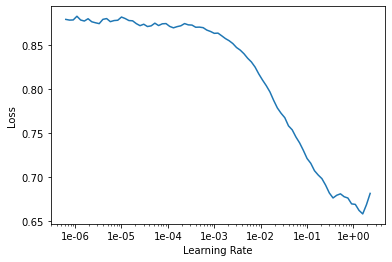

In [61]:
learn.recorder.plot()

In [62]:
learn.fit(10,1e-02)

epoch,train_loss,valid_loss,accuracy,time
0,0.692082,0.708345,0.377500,00:00
1,0.600448,0.579236,0.777500,00:00
2,0.545827,0.494770,0.807500,00:00
3,0.507610,0.476277,0.797500,00:00
4,0.485217,0.476824,0.795000,00:00
5,0.461512,0.469875,0.802500,00:00
6,0.449290,0.451133,0.820000,00:00
7,0.434753,0.462219,0.810000,00:00
8,0.420957,0.466283,0.812500,00:00
9,0.411454,0.477619,0.807500,00:00


In [63]:
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


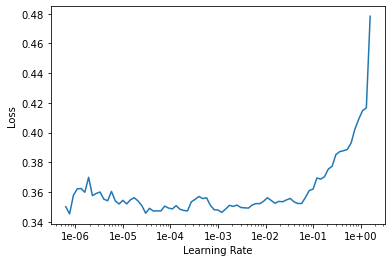

In [64]:
learn.recorder.plot()

In [65]:
learn.fit(10, 1e-03/3)

epoch,train_loss,valid_loss,accuracy,time
0,0.372258,0.475311,0.812500,00:00
1,0.357616,0.473819,0.807500,00:00
2,0.353723,0.473504,0.815000,00:00
3,0.356402,0.471805,0.815000,00:00
4,0.355218,0.470369,0.812500,00:00
5,0.358151,0.470933,0.812500,00:00
6,0.356595,0.472075,0.810000,00:00
7,0.356230,0.470196,0.812500,00:00
8,0.357252,0.469744,0.810000,00:00
9,0.356176,0.469438,0.810000,00:00


In [66]:
learn.show_results(20)

Sex,Embarked,Pclass,Tittle,Age,SibSp,Parch,Fare,target,prediction
0,0,3,Mr,-0.4869,0.3251,-0.4973,-0.5207,0,0
1,1,1,Mrs,0.7315,0.3251,-0.4973,0.8436,1,1
1,0,3,Miss,-0.1823,-0.4691,-0.4973,-0.5063,1,0
1,0,1,Mrs,0.5030,0.3251,-0.4973,0.4562,1,1
0,0,3,Mr,0.5030,-0.4691,-0.4973,-0.5037,0,0


In [67]:
predictions, *_ = learn.get_preds(DatasetType.Test)
labels = np.argmax(predictions, 1)


In [54]:
sub_df = pd.DataFrame({
    'PassengerId': test.PassengerId,
    'Survived':labels
})
sub_df.to_csv('submission13.csv', index=False)

In [55]:
sub_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
